### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [21]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler


In [22]:
# import keys

# keys.access_key()
# configured api's with consumer k

# Use the above credentials to authenticate the API.

# get keys form keys.py
# consumer_key, consumer_key_secret, access_token, access_token_secret = keys.access_key()
auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [23]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [24]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=100, lang="en").items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# take input from user
Topic = "Elon Musk"
# Topic=["Pakistan"]
get_tweets(Topic , Count=100)

Unexpected parameter: exclude


Unexpected parameter: exclude


In [25]:
# Showing the data the Data
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-12-01,@SapientJim45 = JfT ✝️🇺🇸 Welcome Followers‼️,False,WOW 👉🏿 .@elonmusk is being Applauded Massivel...,0,0,
1,2022-12-01,Dante Cantalini,False,Elon Musk 'confident' in Neuralink microchip d...,0,0,
2,2022-12-01,Tamara L Ernst,False,Elon Musk’s Job Cuts Decimated Twitter Team Ta...,0,0,"Munich, Bavaria"
3,2022-12-01,Crissie Schueler,False,@MattWallace888 Or for Elon Musk.,0,0,"Germany, Brazil, Bahrain, Alaska"
4,2022-12-01,Breakfast Nook Wolf,False,How to run a successful business like Elon Mus...,0,0,I dunno
5,2022-12-01,watchamacallit,False,@DineshDSouza I don’t think the President real...,0,0,
6,2022-12-01,Chainparrot,False,EU Chief Fires Another Warning Shot at Elon Mu...,0,0,Some trees
7,2022-12-01,ON.marketing: SEO & Performance Advertising Ag...,False,Elon Musk personally called CEOs of companies ...,0,1,Greece


In [26]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [27]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [28]:


#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Arsenal vs United", we want to remove "Arsenal" "vs" "United" from the WordCloud.

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new



In [29]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-12-01,@SapientJim45 = JfT ✝️🇺🇸 Welcome Followers‼️,False,WOW 👉🏿 .@elonmusk is being Applauded Massivel...,0,0,,wow is being applauded massively on on fox bus...
1,2022-12-01,Dante Cantalini,False,Elon Musk 'confident' in Neuralink microchip d...,0,0,,elon musk confident in neuralink microchip dev...
2,2022-12-01,Tamara L Ernst,False,Elon Musk’s Job Cuts Decimated Twitter Team Ta...,0,0,"Munich, Bavaria",elon musk s job cuts decimated twitter team ta...
3,2022-12-01,Crissie Schueler,False,@MattWallace888 Or for Elon Musk.,0,0,"Germany, Brazil, Bahrain, Alaska",or for elon musk
4,2022-12-01,Breakfast Nook Wolf,False,How to run a successful business like Elon Mus...,0,0,I dunno,how to run a successful business like elon mus...


In [30]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-12-01,@SapientJim45 = JfT ✝️🇺🇸 Welcome Followers‼️,False,WOW 👉🏿 .@elonmusk is being Applauded Massivel...,0,0,,wow is being applauded massively on on fox bus...,Positive
1,2022-12-01,Dante Cantalini,False,Elon Musk 'confident' in Neuralink microchip d...,0,0,,elon musk confident in neuralink microchip dev...,Positive
2,2022-12-01,Tamara L Ernst,False,Elon Musk’s Job Cuts Decimated Twitter Team Ta...,0,0,"Munich, Bavaria",elon musk s job cuts decimated twitter team ta...,Positive
3,2022-12-01,Crissie Schueler,False,@MattWallace888 Or for Elon Musk.,0,0,"Germany, Brazil, Bahrain, Alaska",or for elon musk,Neutral
4,2022-12-01,Breakfast Nook Wolf,False,How to run a successful business like Elon Mus...,0,0,I dunno,how to run a successful business like elon mus...,Positive


In [31]:


# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])



Original tweet:
 Elon Musk is a big bed-wetting doody-head

Clean tweet:
 elon musk is a big bed wetting doody head

Sentiment of the tweet:
 Neutral


In [32]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))


Total Tweets Extracted for Topic : Elon Musk are : 101
Total Positive Tweets are : 33
Total Negative Tweets are : 17
Total Neutral Tweets are : 51


In [33]:
df["Sentiment"].value_counts()

Neutral     51
Positive    33
Negative    17
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

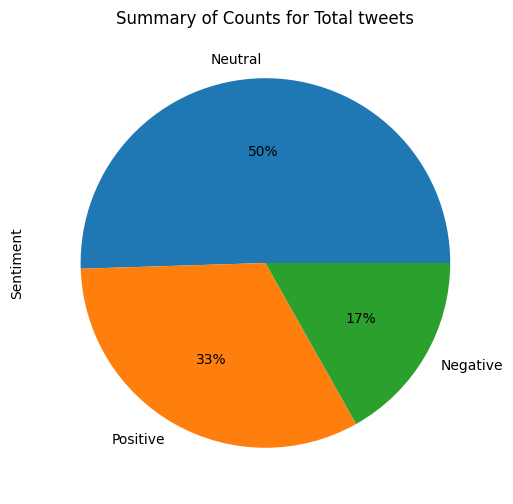

In [41]:
#plotting the data in a pie chart according to the sentiment of the tweets
plt.figure(figsize=(8,6))
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Summary of Counts for Total tweets")





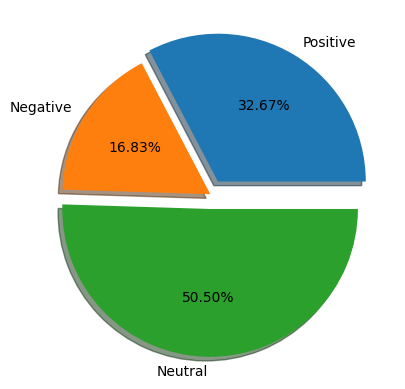

In [42]:



# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');



Text(0.5, 1.0, 'Verified User vs Non Verified User')

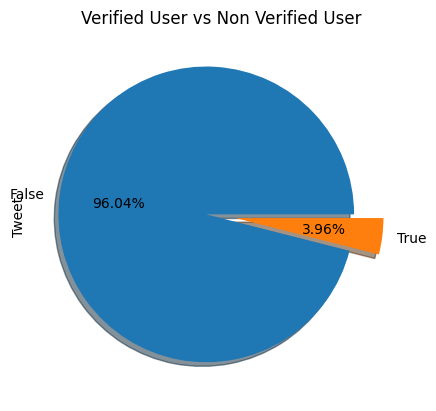

In [43]:
#check if verified user has more tweets

df.groupby("IsVerified")["Tweet"].count().plot(kind="pie",shadow=True,explode=(0.1,0.1),autopct='%1.2f%%')
plt.title("Verified User vs Non Verified User")


